In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data_countries = pd.read_csv('/content/data_counties.csv')
data_municipalities = pd.read_csv('/content/data_municipalities.csv')
elections2023_results= pd.read_csv('/content/wyniki_gl_na_listy_po_gminach_sejm_utf8.csv',sep=';')

In [274]:
data_municipalities[data_municipalities['municipality_name']=='Warszawa']

,municipality_code,municipality_name,county_code,percent_vaccinated,population_total,population_total_m,population_total_f,population_0_4_total,population_0_4_total_m,population_0_4_total_f,...,revenues_per_capita_CIT,expenditures_per_capita,investment_expenditures_per_capita,children_3_5_in_kindergartens,net_scholarization,marriages_per_1000_persons,birthrate_per_1000_persons,net_migrations_per_1000_persons,persons_running_business,entities_registered_per_10k_persons
1280,1465011,Warszawa,1465000,76.0,1861774,858762,1003012,100254,51522,48732,...,545.73,10867.35,1203.96,1013.0,99.51,3.9,-0.81,2.4,262274,2553


In [275]:
data_municipalities.head()

,municipality_code,municipality_name,county_code,percent_vaccinated,population_total,population_total_m,population_total_f,population_0_4_total,population_0_4_total_m,population_0_4_total_f,...,revenues_per_capita_CIT,expenditures_per_capita,investment_expenditures_per_capita,children_3_5_in_kindergartens,net_scholarization,marriages_per_1000_persons,birthrate_per_1000_persons,net_migrations_per_1000_persons,persons_running_business,entities_registered_per_10k_persons
0,201011,Bolesławiec,201000,56.9,37659,17610,20049,1585,821,764,...,56.58,4962.55,142.34,1117.0,113.11,3.2,-6.04,-5.3,3099,1323
1,201022,Bolesławiec,201000,47.7,14967,7473,7494,862,471,391,...,11.74,4859.22,895.71,581.0,68.29,3.2,-0.60,12.5,1431,1086
2,201032,Gromadka,201000,49.5,5156,2559,2597,237,123,114,...,162.36,6318.14,1196.25,662.0,89.37,2.1,-3.48,-1.4,257,673
3,201043,Nowogrodziec,201000,47.5,14852,7414,7438,817,432,385,...,30.53,4972.40,379.00,615.0,84.88,4.1,-0.67,0.5,1070,871
4,201052,Osiecznica,201000,52.2,7358,3703,3655,397,206,191,...,27.93,4837.36,282.14,762.0,100.15,4.8,-2.15,1.7,539,896


# **I can delete last number from municipality_code because 6 numbers are enough to distinguish one municipality from the other**


In [276]:
elections2023_results.head()

,TERYT Gminy,Gmina,Powiat,Województwo,Nr okręgu,Liczba komisji,Liczba uwzględnionych komisji,Komisja otrzymała kart do głosowania,Liczba wyborców uprawnionych do głosowania,Nie wykorzystano kart do głosowania,...,KOMITET WYBORCZY NOWA LEWICA,KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ,KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ,KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI,KOMITET WYBORCZY POLSKA JEST JEDNA,KOMITET WYBORCZY WYBORCÓW RUCHU DOBROBYTU I POKOJU,KOMITET WYBORCZY NORMALNY KRAJ,KOMITET WYBORCZY ANTYPARTIA,KOMITET WYBORCZY RUCH NAPRAWY POLSKI,KOMITET WYBORCZY WYBORCÓW MNIEJSZOŚĆ NIEMIECKA
0,NaN,Albania,zagranica,NaN,19,1,1,834.0,855.0,19.0,...,143.0,69.0,61.0,378.0,10.0,NaN,NaN,NaN,NaN,NaN
1,NaN,Algieria,zagranica,NaN,19,1,1,100.0,66.0,40.0,...,6.0,9.0,5.0,27.0,0.0,NaN,NaN,NaN,NaN,NaN
2,NaN,Angola,zagranica,NaN,19,1,1,60.0,27.0,36.0,...,2.0,4.0,4.0,9.0,2.0,NaN,NaN,NaN,NaN,NaN
3,NaN,Azerbejdżan,zagranica,NaN,19,1,1,250.0,87.0,163.0,...,11.0,3.0,5.0,51.0,2.0,NaN,NaN,NaN,NaN,NaN
4,NaN,Argentyna,zagranica,NaN,19,1,1,235.0,224.0,35.0,...,46.0,36.0,12.0,58.0,0.0,NaN,NaN,NaN,NaN,NaN


In [277]:
def delete_last_number(name):
    return str(name)[:-1]

data_municipalities['municipality_code'] = data_municipalities['municipality_code'].apply(delete_last_number)


In [278]:
len(elections2023_results)


2585

In [279]:
elections2023_results.dropna(subset=['TERYT Gminy'],inplace=True)
len(elections2023_results)

2494

# **In dataframe elections there are distinguished results for each district of Warsaw, but in df data_municipalities there is only value for the whole city**


In [280]:
warsaw = elections2023_results[elections2023_results['Powiat']=='Warszawa']
#warsaw.groupby('Powiat').sum().reset_index()
columns_not_to_sum = ['Gmina','TERYT Gminy','Powiat','Województwo','Nr okręgu']

columns_to_sum = []

for col in warsaw.columns:
  if col not in columns_not_to_sum:
    columns_to_sum.append(col)

agg_dict = {}

for col in columns_not_to_sum:
    agg_dict[col] = 'first'
for col in columns_to_sum:
    agg_dict[col] = 'sum'



warsaw_city = warsaw.groupby('Powiat').agg(agg_dict)
warsaw_city.reset_index(drop= True,inplace=True)
warsaw_city.loc[0, 'TERYT Gminy'] = 146501
warsaw_city.loc[0, 'Gmina'] = 'Warszawa'

warsaw_city.head()





,Gmina,TERYT Gminy,Powiat,Województwo,Nr okręgu,Liczba komisji,Liczba uwzględnionych komisji,Komisja otrzymała kart do głosowania,Liczba wyborców uprawnionych do głosowania,Nie wykorzystano kart do głosowania,...,KOMITET WYBORCZY NOWA LEWICA,KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ,KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ,KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI,KOMITET WYBORCZY POLSKA JEST JEDNA,KOMITET WYBORCZY WYBORCÓW RUCHU DOBROBYTU I POKOJU,KOMITET WYBORCZY NORMALNY KRAJ,KOMITET WYBORCZY ANTYPARTIA,KOMITET WYBORCZY RUCH NAPRAWY POLSKI,KOMITET WYBORCZY WYBORCÓW MNIEJSZOŚĆ NIEMIECKA
0,Warszawa,146501.0,Warszawa,mazowieckie,19,805,805,1300187.0,1357214.0,133771.0,...,148116.0,252746.0,73083.0,483832.0,12329.0,0.0,0.0,0.0,0.0,0.0


In [281]:
elections2023_results.drop(elections2023_results[elections2023_results['Powiat']=='Warszawa'].index, inplace=True)

elections2023_results =  pd.concat([elections2023_results, warsaw_city], ignore_index=True)
len(elections2023_results)




2477

In [282]:
len(data_municipalities)

2477

In [329]:

try:
    data_municipalities['municipality_code'] = data_municipalities['municipality_code'].astype(int, errors='raise')
except ValueError:
    print("There are non numerical objects!")



In [284]:
len(elections2023_results)

2477

In [285]:
political_view = pd.merge(data_municipalities,elections2023_results,left_on='municipality_code',right_on='TERYT Gminy')

In [286]:

columns_to_use=['municipality_code','Gmina', 'municipality_name', 'county_code',
       'percent_vaccinated', 'population_total', 'population_total_m',
       'population_total_f','Liczba głosów ważnych oddanych łącznie na wszystkie listy kandydatów','KOMITET WYBORCZY BEZPARTYJNI SAMORZĄDOWCY',
       'KOALICYJNY KOMITET WYBORCZY TRZECIA DROGA POLSKA 2050 SZYMONA HOŁOWNI - POLSKIE STRONNICTWO LUDOWE',
       'KOMITET WYBORCZY NOWA LEWICA',
       'KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ',
       'KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ',
       'KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI',
       'KOMITET WYBORCZY POLSKA JEST JEDNA']

political_view[columns_to_use].head()

,municipality_code,Gmina,municipality_name,county_code,percent_vaccinated,population_total,population_total_m,population_total_f,Liczba głosów ważnych oddanych łącznie na wszystkie listy kandydatów,KOMITET WYBORCZY BEZPARTYJNI SAMORZĄDOWCY,KOALICYJNY KOMITET WYBORCZY TRZECIA DROGA POLSKA 2050 SZYMONA HOŁOWNI - POLSKIE STRONNICTWO LUDOWE,KOMITET WYBORCZY NOWA LEWICA,KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ,KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ,KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI,KOMITET WYBORCZY POLSKA JEST JEDNA
0,20101,m. Bolesławiec,Bolesławiec,201000,56.9,37659,17610,20049,20297.0,869.0,2338.0,2035.0,5807.0,1254.0,7695.0,299.0
1,20102,gm. Bolesławiec,Bolesławiec,201000,47.7,14967,7473,7494,8024.0,354.0,1091.0,650.0,2687.0,662.0,2436.0,144.0
2,20103,gm. Gromadka,Gromadka,201000,49.5,5156,2559,2597,2611.0,77.0,210.0,208.0,1161.0,194.0,623.0,138.0
3,20104,gm. Nowogrodziec,Nowogrodziec,201000,47.5,14852,7414,7438,7111.0,271.0,902.0,585.0,3056.0,652.0,1517.0,128.0
4,20105,gm. Osiecznica,Osiecznica,201000,52.2,7358,3703,3655,3240.0,112.0,375.0,300.0,1133.0,301.0,946.0,73.0


In [287]:
columns_to_count = ['KOMITET WYBORCZY BEZPARTYJNI SAMORZĄDOWCY',
       'KOALICYJNY KOMITET WYBORCZY TRZECIA DROGA POLSKA 2050 SZYMONA HOŁOWNI - POLSKIE STRONNICTWO LUDOWE',
       'KOMITET WYBORCZY NOWA LEWICA',
       'KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ',
       'KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ',
       'KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI',
       'KOMITET WYBORCZY POLSKA JEST JEDNA']

for i,col in enumerate(columns_to_count):
  political_view[col+"_percentage"] = political_view[col]/political_view['Liczba głosów ważnych oddanych łącznie na wszystkie listy kandydatów']*100


In [288]:
political_view.head()

,municipality_code,municipality_name,county_code,percent_vaccinated,population_total,population_total_m,population_total_f,population_0_4_total,population_0_4_total_m,population_0_4_total_f,...,KOMITET WYBORCZY ANTYPARTIA,KOMITET WYBORCZY RUCH NAPRAWY POLSKI,KOMITET WYBORCZY WYBORCÓW MNIEJSZOŚĆ NIEMIECKA,KOMITET WYBORCZY BEZPARTYJNI SAMORZĄDOWCY_percentage,KOALICYJNY KOMITET WYBORCZY TRZECIA DROGA POLSKA 2050 SZYMONA HOŁOWNI - POLSKIE STRONNICTWO LUDOWE_percentage,KOMITET WYBORCZY NOWA LEWICA_percentage,KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ_percentage,KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ_percentage,KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI_percentage,KOMITET WYBORCZY POLSKA JEST JEDNA_percentage
0,20101,Bolesławiec,201000,56.9,37659,17610,20049,1585,821,764,...,NaN,NaN,NaN,4.281421,11.518944,10.026112,28.610139,6.178253,37.912007,1.473124
1,20102,Bolesławiec,201000,47.7,14967,7473,7494,862,471,391,...,NaN,NaN,NaN,4.411765,13.596710,8.100698,33.487039,8.250249,30.358923,1.794616
2,20103,Gromadka,201000,49.5,5156,2559,2597,237,123,114,...,NaN,NaN,NaN,2.949062,8.042895,7.966296,44.465722,7.430103,23.860590,5.285331
3,20104,Nowogrodziec,201000,47.5,14852,7414,7438,817,432,385,...,NaN,NaN,NaN,3.810997,12.684573,8.226691,42.975671,9.168893,21.333146,1.800028
4,20105,Osiecznica,201000,52.2,7358,3703,3655,397,206,191,...,NaN,NaN,NaN,3.456790,11.574074,9.259259,34.969136,9.290123,29.197531,2.253086


In [289]:
political_view.sort_values(by='KOALICYJNY KOMITET WYBORCZY TRZECIA DROGA POLSKA 2050 SZYMONA HOŁOWNI - POLSKIE STRONNICTWO LUDOWE_percentage',ascending=False).head(15)

,municipality_code,municipality_name,county_code,percent_vaccinated,population_total,population_total_m,population_total_f,population_0_4_total,population_0_4_total_m,population_0_4_total_f,...,KOMITET WYBORCZY ANTYPARTIA,KOMITET WYBORCZY RUCH NAPRAWY POLSKI,KOMITET WYBORCZY WYBORCÓW MNIEJSZOŚĆ NIEMIECKA,KOMITET WYBORCZY BEZPARTYJNI SAMORZĄDOWCY_percentage,KOALICYJNY KOMITET WYBORCZY TRZECIA DROGA POLSKA 2050 SZYMONA HOŁOWNI - POLSKIE STRONNICTWO LUDOWE_percentage,KOMITET WYBORCZY NOWA LEWICA_percentage,KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ_percentage,KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ_percentage,KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI_percentage,KOMITET WYBORCZY POLSKA JEST JEDNA_percentage
2064,280704,Kisielice,2807000,48.3,5715,2920,2795,298,163,135,...,NaN,NaN,NaN,0.760746,38.151388,2.928870,39.786991,5.173070,12.400152,0.494485
288,41704,Płużnica,417000,56.0,4613,2335,2278,239,103,136,...,NaN,NaN,NaN,0.955849,37.733273,5.097861,38.552572,5.917160,10.878471,0.637233
186,40209,Świedziebnia,402000,54.0,4996,2540,2456,319,169,150,...,NaN,NaN,NaN,0.699301,36.281366,4.566022,42.081448,5.717812,9.378856,0.946113
228,40805,Kikół,408000,52.5,6770,3456,3314,334,173,161,...,NaN,NaN,NaN,0.863931,33.539031,6.263499,40.203641,6.417772,11.601358,0.771367
1551,200504,Czyże,2005000,39.2,1895,921,974,62,23,39,...,NaN,NaN,NaN,1.331853,33.074362,6.326304,22.086570,7.325194,26.970033,0.554939
2089,281202,Biskupiec,2812000,52.3,8880,4505,4375,479,228,251,...,NaN,NaN,NaN,1.101993,32.708089,4.478312,43.634232,5.533411,11.512309,0.867526
1811,240605,Opatów,2406000,48.4,6700,3334,3366,333,158,175,...,NaN,NaN,NaN,1.972603,31.616438,5.534247,37.561644,7.506849,13.917808,1.890411
2303,302301,Słupca,3023000,66.8,13381,6405,6976,622,329,293,...,NaN,NaN,NaN,2.071767,31.360867,6.716317,32.024374,4.387271,21.976980,1.272850
1354,180108,Ustrzyki Dolne,1801000,41.0,16680,8178,8502,723,357,366,...,NaN,NaN,NaN,1.322751,31.337181,3.691679,37.854738,9.403559,16.005291,NaN
1553,200506,Hajnówka,2005000,39.2,3747,1896,1851,170,89,81,...,NaN,NaN,NaN,0.701052,31.146720,5.758638,22.784176,11.617426,25.638458,1.001502


In [290]:
political_view.to_csv('politicalview.csv',index=False)

In [291]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(25, 80, 11)]
political_view['Interval'] = pd.cut(political_view['percent_vaccinated'],bins =[25,36,47,58,69,80],labels=labels)

In [292]:
political_view.head()

,municipality_code,municipality_name,county_code,percent_vaccinated,population_total,population_total_m,population_total_f,population_0_4_total,population_0_4_total_m,population_0_4_total_f,...,KOMITET WYBORCZY RUCH NAPRAWY POLSKI,KOMITET WYBORCZY WYBORCÓW MNIEJSZOŚĆ NIEMIECKA,KOMITET WYBORCZY BEZPARTYJNI SAMORZĄDOWCY_percentage,KOALICYJNY KOMITET WYBORCZY TRZECIA DROGA POLSKA 2050 SZYMONA HOŁOWNI - POLSKIE STRONNICTWO LUDOWE_percentage,KOMITET WYBORCZY NOWA LEWICA_percentage,KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ_percentage,KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ_percentage,KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI_percentage,KOMITET WYBORCZY POLSKA JEST JEDNA_percentage,Interval
0,20101,Bolesławiec,201000,56.9,37659,17610,20049,1585,821,764,...,NaN,NaN,4.281421,11.518944,10.026112,28.610139,6.178253,37.912007,1.473124,47 - 58
1,20102,Bolesławiec,201000,47.7,14967,7473,7494,862,471,391,...,NaN,NaN,4.411765,13.596710,8.100698,33.487039,8.250249,30.358923,1.794616,47 - 58
2,20103,Gromadka,201000,49.5,5156,2559,2597,237,123,114,...,NaN,NaN,2.949062,8.042895,7.966296,44.465722,7.430103,23.860590,5.285331,47 - 58
3,20104,Nowogrodziec,201000,47.5,14852,7414,7438,817,432,385,...,NaN,NaN,3.810997,12.684573,8.226691,42.975671,9.168893,21.333146,1.800028,47 - 58
4,20105,Osiecznica,201000,52.2,7358,3703,3655,397,206,191,...,NaN,NaN,3.456790,11.574074,9.259259,34.969136,9.290123,29.197531,2.253086,47 - 58


Interval
25 - 36    Axes(0.125,0.11;0.775x0.77)
36 - 47    Axes(0.125,0.11;0.775x0.77)
47 - 58    Axes(0.125,0.11;0.775x0.77)
58 - 69    Axes(0.125,0.11;0.775x0.77)
69 - 80    Axes(0.125,0.11;0.775x0.77)
Name: percent_vaccinated, dtype: object

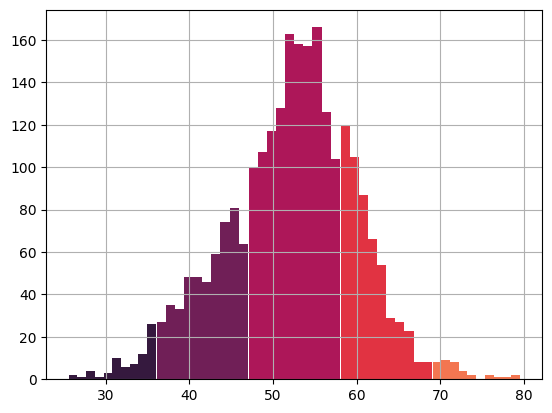

In [293]:
political_view.groupby('Interval')['percent_vaccinated'].hist()

In [294]:
vaccinated_25bin= political_view[political_view['Interval'] =='25 - 36']
vaccinated_36bin= political_view[political_view['Interval'] =='36 - 47']
vaccinated_47bin= political_view[political_view['Interval'] =='47 - 58']
vaccinated_58bin= political_view[political_view['Interval'] =='58 - 69']
vaccinated_69bin= political_view[political_view['Interval'] =='69 - 80']

vaccinated_columns=[
       'KOALICYJNY KOMITET WYBORCZY TRZECIA DROGA POLSKA 2050 SZYMONA HOŁOWNI - POLSKIE STRONNICTWO LUDOWE_percentage',
       'KOMITET WYBORCZY NOWA LEWICA_percentage',
       'KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ_percentage',
       'KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ_percentage',
       'KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI_percentage']


In [295]:
vaccinated_25bin.head()

,municipality_code,municipality_name,county_code,percent_vaccinated,population_total,population_total_m,population_total_f,population_0_4_total,population_0_4_total_m,population_0_4_total_f,...,KOMITET WYBORCZY RUCH NAPRAWY POLSKI,KOMITET WYBORCZY WYBORCÓW MNIEJSZOŚĆ NIEMIECKA,KOMITET WYBORCZY BEZPARTYJNI SAMORZĄDOWCY_percentage,KOALICYJNY KOMITET WYBORCZY TRZECIA DROGA POLSKA 2050 SZYMONA HOŁOWNI - POLSKIE STRONNICTWO LUDOWE_percentage,KOMITET WYBORCZY NOWA LEWICA_percentage,KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ_percentage,KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ_percentage,KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI_percentage,KOMITET WYBORCZY POLSKA JEST JEDNA_percentage,Interval
339,60208,Księżpol,602000,35.9,6807,3405,3402,362,172,190,...,NaN,NaN,1.137656,12.713311,2.218430,59.072810,8.674630,12.798635,2.957907,25 - 36
344,60213,Tereszpol,602000,34.0,3886,1960,1926,186,91,95,...,NaN,NaN,2.111226,15.190525,3.707518,56.282183,9.165808,10.041195,3.295572,25 - 36
372,60504,Godziszów,605000,35.7,5618,2799,2819,255,146,109,...,NaN,NaN,0.290360,4.703833,1.742160,78.890825,9.262485,2.380952,2.264808,25 - 36
407,60812,Serniki,608000,34.5,4840,2415,2425,261,136,125,...,NaN,NaN,1.591414,10.658771,3.626943,58.771281,9.215396,7.957069,7.142857,25 - 36
426,61002,Ludwin,610000,35.1,5593,2788,2805,376,184,192,...,NaN,NaN,1.931701,11.590204,3.966885,50.914108,10.106933,17.040359,3.690928,25 - 36


In [296]:
len(vaccinated_25bin)

72

<ipython-input-297-71f9ae516459>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Interval', y='KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ_percentage', data=political_view,


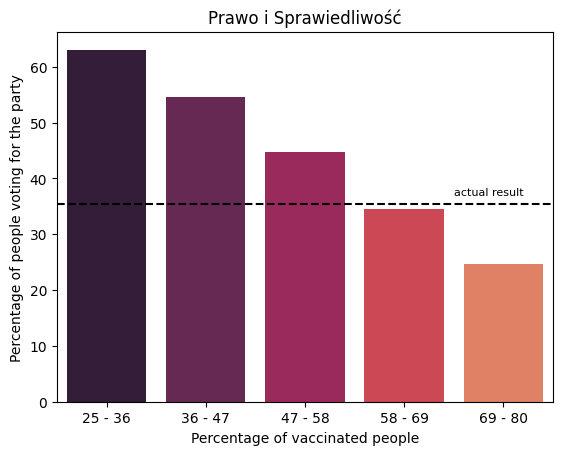

In [297]:
sns.set_palette("rocket")

sns.barplot(x='Interval', y='KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ_percentage', data=political_view,
            hue='Interval', ci=None)
plt.xlabel("Percentage of vaccinated people")
plt.ylabel("Percentage of people voting for the party")
plt.axhline(y=35.38, color='black', linestyle='--')
plt.text(3.5, 37, 'actual result', fontsize = 8)
plt.title('Prawo i Sprawiedliwość')

plt.show()


<ipython-input-298-68ea29ae1cd8>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Interval', y='KOALICYJNY KOMITET WYBORCZY TRZECIA DROGA POLSKA 2050 SZYMONA HOŁOWNI - POLSKIE STRONNICTWO LUDOWE_percentage', data=political_view,


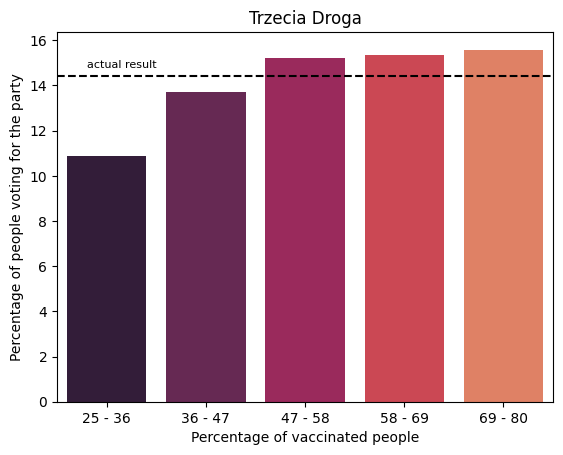

In [298]:
sns.set_palette("rocket")

sns.barplot(x='Interval', y='KOALICYJNY KOMITET WYBORCZY TRZECIA DROGA POLSKA 2050 SZYMONA HOŁOWNI - POLSKIE STRONNICTWO LUDOWE_percentage', data=political_view,
            hue='Interval', ci=None)
plt.xlabel("Percentage of vaccinated people")
plt.ylabel("Percentage of people voting for the party")
plt.axhline(y=14.40, color='black', linestyle='--')
plt.text(-0.2, 14.8, 'actual result', fontsize = 8)
plt.title('Trzecia Droga')
plt.show()


<ipython-input-299-482a1826c801>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Interval', y='KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI_percentage', data=political_view,


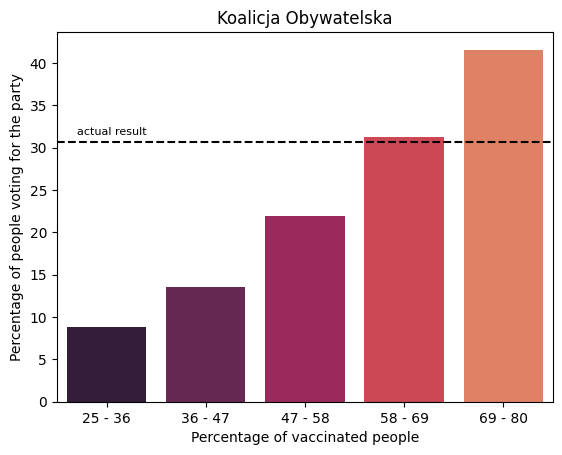

In [299]:
sns.set_palette("rocket")

sns.barplot(x='Interval', y='KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI_percentage', data=political_view,
            hue='Interval', ci=None)
plt.xlabel("Percentage of vaccinated people")
plt.ylabel("Percentage of people voting for the party")
plt.axhline(y=30.70, color='black', linestyle='--')
plt.text(-0.3, 31.5, 'actual result', fontsize = 8)
plt.title('Koalicja Obywatelska')

plt.show()


<ipython-input-328-e3453369d6ef>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


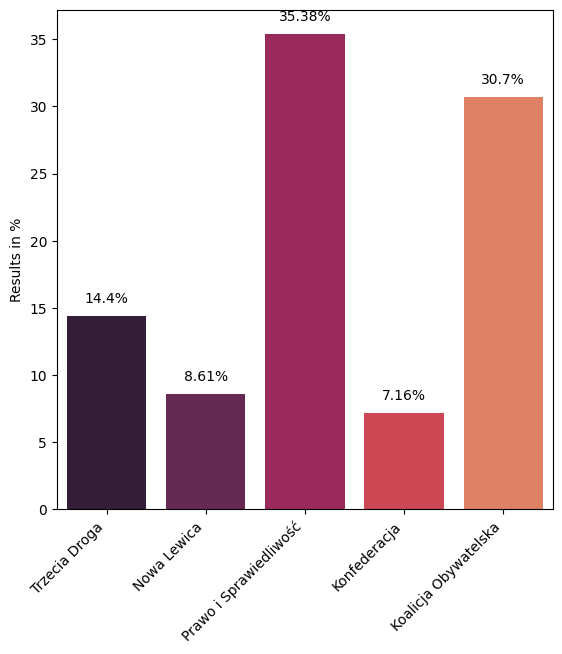

In [328]:
results={'Party Name':['Trzecia Droga','Nowa Lewica','Prawo i Sprawiedliwość','Konfederacja','Koalicja Obywatelska'],
      'Result':[14.40,8.61,35.38,7.16,30.70]}
results_df = pd.DataFrame(results)
ax=sns.barplot(data=results_df, x='Party Name',y='Result', hue='Party Name',)
for index, row in results_df.iterrows():
    ax.text(index, row['Result'] + 1, str(row['Result'])+'%', ha='center')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.xlabel("")
plt.ylabel("Results in %")
plt.subplots_adjust(top=1.15)


plt.show()